# SVM
Is one of the most popular algorithms, that could be used for both linear regression and classification, but it's mostly used for complex classification, where data is small or medium-sized

The main idea of SVM is to plot decision boundary in such way that it separates classes and it separetes them safely.That is to say that with new instances it will perfom as well as earlier.To do that we use *support vectors*, that in essence are tangents to the uttermost instances.And, in the middle of this vectors, plots the decision boundary.<br>
This model's algorithm is very sensetive to the scaling, so we must use StandardScaler before we use it.For example, if one instance is in the hundreds and other is smaller than 5 than there will be little to no space between two support vectors, which is obviously terrible for our decision boundary plotting.

When we build model strictly according to the support vectors we have a huge problem: this method(*hard margin classification*) will perform terribly with outliers and it may now work because data is not linearly seperatable(we can't draw a line between them because they are messed up).To fix this we use *soft margin classification*.It means, we can choose to ignore some *margin violations* in price of widining our "street"(distance between 2 support vectors).It will contain a few instances in boundaries, but most of the time it will perform better.The hyperparamater that answers for how much do we ignore violations is *c*, the lower it is, the wider is the street and the harsher are violations.

In 1-dimensional space we draw a point("1-dim. flat affine"), when 2, we draw a line, when 3 we draw a plane.>4 we create a hyperplane.But we can only draw one figure to separate the data.But what if we have higher oerlapping?It means, that one class is between the other like, for example, drug dose, where only exact amount cures the patient.Than support vector classifiers and hard(maximum) margin classifiers will do no work and we must use Support Vector Machines(SVM).In that case we conver small-dimensonal data in high dimensional and use support vector(soft margin) classifier to separate the data.For examply, we conver one feature in polynomial.<br>
But how do we decide how to transform data?Kernel helps us do the math to find the SV classifiers.For example, we set the dimension via kernel for polynomial and then compute the relationship between each pare of data(1 point with n - 1 other, second with n- 1 others and so on).Then this correlations are used to build Support Vector Classifiers.<br>
We can use Cross-Validation to find the optimum degree for polynomial feature or bias-variance trade-off for SVClassifier.<br>
Finally, we can use Radial function, that assigns the class with the help of it's nearest neighbours.It works in infinite dimensions, that why we can't work with that functions if we actually do transformation of the data, but kernels use *"Kernel's trick"* to find correlations between the data as if they were in higher dimensions, without actually transforming it.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # Petal width and length
y = (iris["target"] == 2).astype(int)  # Iris-Verginica
svm_reg = Pipeline((
    ("std_sclaer", StandardScaler()),
    ("svm_classifier", LinearSVC(C=1, loss="hinge"))
))

svm_reg.fit(X, y)

Pipeline(memory=None,
         steps=[('std_sclaer',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_classifier',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [2]:
svm_reg.predict([[5.5, 1.7]])

array([1])

Unlike Logistic Regression, it can't show us a probability

### Non-linear data

But not all data is linearly separatable, altough sometimes we can transform these data to such using more features like with polynomial regression(we use PolynomialFeatures)

In [3]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
X, y = make_moons(n_samples=100, noise=0.15)

def plot_data(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.axis(axes)
    plt.grid(True)

plot_data(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_svm_class = Pipeline((
    ("poly_feature", PolynomialFeatures(degree=3)),
    ("std_sclaer", StandardScaler()),
    ("svm_classifier", LinearSVC(C=10, loss="hinge"))
))

poly_svm_class.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_feature',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_sclaer',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_classifier',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

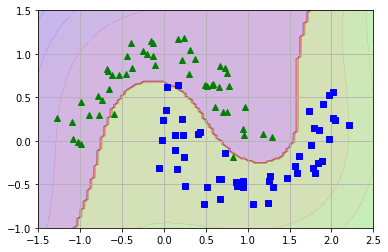

In [5]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(poly_svm_class, [-1.5, 2.5, -1, 1.5])
plot_data(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

### Polynomial kernel
We can use polynomial feature not just in SVMs.Just use kernel "poly", we won't have combinatorical explosian of features(making our data fully meaningless) even we make high dgrees, although it still can over-/under-fit.

We make the kernel like this: we take $(a * b * ... * n + r(coefficient))^d$ and then take (a * b ... + r)* (a * b.. + r) and build coordinates according to tha multiplication ($a, a^2, 1/2$), ($b, b^2, 1/2$) (dot product).We can ignore z-axis, because they have the smae coordinates.The correlation is exactly the dot product.It means we can just directly compute $(a * b)^2$ to find correlations between the data.

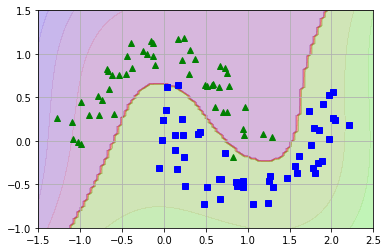

In [6]:
from sklearn.svm import SVC
svc_poly = Pipeline((
    ("std_scaler", StandardScaler()),
    ("svc_clf", SVC(kernel="poly", degree=3, C=5, coef0=1))
))

svc_poly.fit(X, y)
plot_predictions(svc_poly, [-1.5, 2.5, -1, 1.5])
plot_data(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

## RBF function
We use neighbors as the means of weight to determine the classification. The closest have high influence, the farthest the lowest influence. This influence is directly computed with the help of squared distance between different observations($(a-b)^2$) and $\gamma$(gamma) is used to determine how big our influence is. Because we use exponential, the higher is the result of a computation, the closer the value will be to the zero and lesser influence it will have.<br>
\begin{equation} e^{\gamma*(a - b)^2} \end{equation}
We must keep in mind that these observations are high-dimensional correlations between instances.<br>
Infinite dimensions in RBF is in essence just many polynomials with r = 0 with different ds(degrees) added together. We keep the dot product(correlations) between infinite numbers of such polynomials.So, we can transform our equation and move outside exponential in the power of ab. This exponential can be transformed using Taylor's series with a = 0(Macclareaun series) to look the same as with the case of polynomial, just with factorial root as the coefficient. We can transform another part of the equation in $s^2$ just to add to our dot product. In the end, we will have a dot product of s, root and a/bs in infinite dimensions(so we have correlations in infinite dimensions).<br>
[more clear explanation](https://www.youtube.com/watch?v=Qc5IyLW_hns&t=15s)

In [8]:
rbf_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=0.5, C=0.001))
))
rbf_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

We can decide which kernel to use via grid search and cross-validation, but it's safe to assume for large datasets to use linear kernel and for small RBF.

SVC has terrible complexity for large datasets, but it's the best fit for small and medium sized complex datasets.We can also use much faster algorithm LinearSVC for other cases, but it doesn't support kernel trick(to find correlations in infinite deminsions for RBF, for example).

SVM can not only perform linear and non-linear classifications tasks, but also linear and non-lieanr regression, for that we must use other method `LinearSVR`, which does the work.This time, we change the objective to fill as much instance in road as possible(without making it insensitive to feautures).This * "width" * is corrected with the helpd of $\epsilon$ value.

In [10]:
from sklearn.svm import LinearSVR
lin_svm = LinearSVR(epsilon=1.5)
lin_svm.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

We can create quadratic SVM.

In [11]:
from sklearn.svm import SVR
quad_svm = SVR(degree=2, C=0.1, epsilon=0.1, kernel="poly")
quad_svm.fit(X, y)

C:\Users\1\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=0.1, cache_size=200, coef0=0.0, degree=2, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

LinearSVC(classifier) has the same linear complexity as LinearSVR(Regression), but only SVC and SVR support kernel trick.